![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Deep Learning Methods </center>
## <center> Lecture 8 - CNN Architectures</center>
### <center> Object Detection </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/DeepLearningMethods/08_CnnArchitectures/MainObjectDetection.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib 
import torch
import torchvision

### Coco labels:
Coco data:
https://cocodataset.org/#home

In [3]:
COCO_LABELS = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

numLabels = len(COCO_LABELS)

#### Load images from pexels:
https://www.pexels.com/

In [4]:
import torchvision.transforms.functional as TF
import PIL

dirPath        = './'
lImageFileName = [
    'pexels-photo-736716.jpeg',
    'pexels-photo-109919.jpeg',
    'pexels-photo-2914265.jpeg',
    'pexels-photo-1031698.jpeg',
]

def GetImage(idx):
    fileName = dirPath + lImageFileName[idx]
    oImage   = PIL.Image.open(fileName)
    mI       = TF.to_tensor(oImage)
    oImage.close()
    
    return mI

#### Load an image:

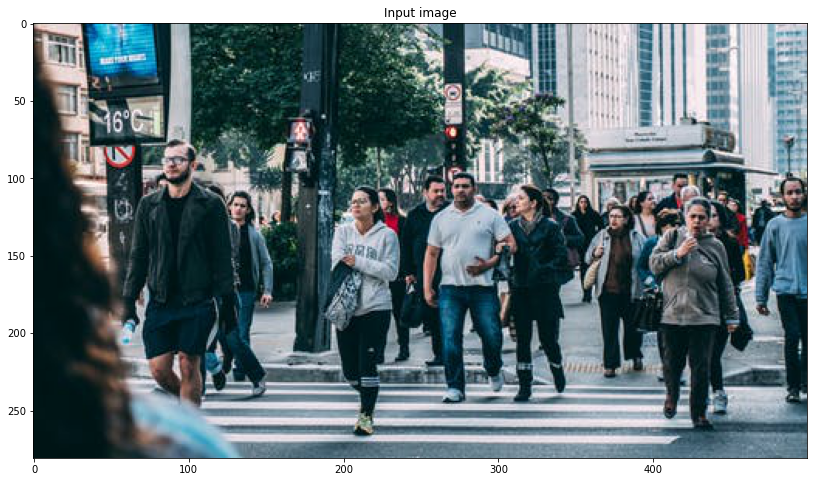

In [5]:
mI    = GetImage(1)
_, ax = plt.subplots(figsize=(18,8))

ax.imshow   (mI.numpy().transpose(1,2,0))
ax.set_title('Input image')
plt.show    ()

### Load a pretrained model:

In [6]:
oModel = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()

#### Apply the model:

In [7]:
with torch.no_grad():
    dOut = oModel([mI])[0]

dOut.keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

#### Plot results:

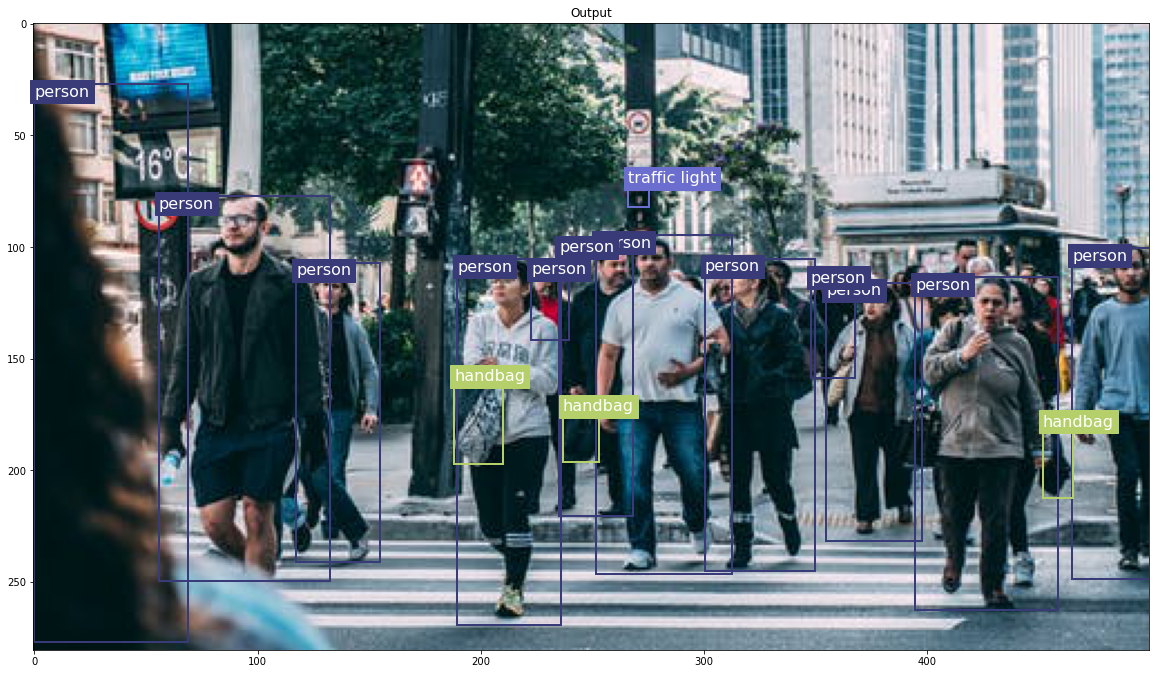

In [8]:
cmap    = plt.get_cmap('tab20b')
lColors = [cmap(ii) for ii in np.linspace(0, 1, numLabels)]

_, ax = plt.subplots(figsize=(20, 20))

ax.imshow   (mI.numpy().transpose(1,2,0))
ax.set_title('Output')
for ii in range(len(dOut['labels'])):
    if dOut['scores'][ii] < 0.75:
        continue
        
    vBBox  = dOut['boxes'][ii]
    label  = dOut['labels'][ii]
    x, y   = vBBox[:2]
    width  = vBBox[2] - vBBox[0]
    height = vBBox[3] - vBBox[1]
    color  = lColors[label]
    oBbox  = matplotlib.patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=color, facecolor='none')
    
    ax.add_patch(oBbox)
    ax.text(x, y, s=COCO_LABELS[label], color='white', verticalalignment='top', bbox={'color':color}, fontdict={'size':16})
plt.show()